1) Visualizar puntaje vs cambio en ir/no ir
2) Heatmap de puntaje promedio en alpha(0:10) vs beta(1:50), gamma en (-0.5,0.5)
3) 2,5 jugadores
4) Delta=100, epsilon=500, zeta=[1,3,6] con mejores parámetros de wsls

In [1]:
import EmergenceDCL as DL
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
p = 0.6 # threshold
Pl = 5 # number of players
rounds = 50 # number of rounds
groups = 10 # number of groups
gameParameters = [p, Pl, rounds, groups]
TO_FILE = True

playerParameters = {'ALL': 0.05} # Bias towards ALL
playerParameters['NOTHING'] = 0.05 # Bias towards NOTHING
playerParameters['ALTER1'] = 0.05 # Bias towards 3-GO-2-STAY
playerParameters['ALTER2'] = 0.05 # Bias towards 3-GO-2-STAY
playerParameters['ALTER3'] = 0.05 # Bias towards 3-GO-2-STAY
playerParameters['ALTER4'] = 0.05 # Bias towards 3-GO-2-STAY
playerParameters['ALTER5'] = 0.05 # Bias towards 3-GO-2-STAY
playerParameters['alpha'] = 100 # How much the focal region augments attractiveness
playerParameters['beta'] = 30 # Amplitude of the WSLS sigmoid function
playerParameters['gamma'] = 31 # Position of the WSLS sigmoid function
playerParameters['delta'] = 0 # How much the added FRA similarities augments attractiveness
playerParameters['epsilon'] = 0 # Amplitude of the FRA sigmoid function
playerParameters['zeta'] = 0 # Position of the FRA sigmoid function

for alpha in range(11):
    for beta in range(1,51):
        for gamma in [-0.5,0.5]:
            playerParameters['alpha'] = alpha
            playerParameters['beta'] = beta
            playerParameters['gamma'] = gamma
            E = DL.Experiment(gameParameters, playerParameters)
            if TO_FILE:
                with open('temp.csv', 'w') as dfile:
                    head = 'Group,Round,Player,Decision,Score,Strategy\n'
                    dfile.write(head)
                E.df = pd.read_csv('temp.csv')
            E.run_simulation()
            if TO_FILE:
                E.df = pd.read_csv('temp.csv')
                os.remove("temp.csv")
            E.df.to_csv('../Data/alpha{}_beta{}_gamma{}.csv'.format(alpha,beta,gamma),index=False)

In [2]:
sims = pd.DataFrame()
dfs = os.listdir('../Data')
dfs = ['../Data/'+d for d in dfs]
for d in dfs:
    df = pd.read_csv(d)
    alpha = int(d[13]) if d[14]=='_' else 10
    b_pos = d.find('beta')
    beta = int(d[b_pos+4]) if d[b_pos+5]=='_' else int(d[b_pos+4:b_pos+6])
    gamma = -0.5 if '-' in d else 0.5
    df.insert(6,'Alpha',alpha)
    df.insert(7,'Beta',beta)
    df.insert(8,'Gamma',gamma)
    df.insert(9,'Consistency',0)
    for i in range(0,len(df)):
        if df['Round'].iloc[i] != 1: df['Consistency'].iloc[i] = int(df['Decision'].iloc[i]==df['Decision'].iloc[i-5])
    sims = pd.concat([sims,df])
sims.to_csv('simulaciones.csv',index=False)

In [2]:
sims = pd.read_csv('simulaciones.csv')

In [3]:
sims.head(20)

,Group,Round,Player,Decision,Score,Strategy,Alpha,Beta,Gamma,Consistency
0,1189973230351647961780900,1,118993,1,1,0,0,10,-0.5,0
1,1189973230351647961780900,1,732306,0,0,0,0,10,-0.5,0
2,1189973230351647961780900,1,351648,0,0,0,0,10,-0.5,0
3,1189973230351647961780900,1,796175,0,0,0,0,10,-0.5,0
4,1189973230351647961780900,1,80900,1,1,0,0,10,-0.5,0
5,1189973230351647961780900,2,118993,0,0,6,0,10,-0.5,0
6,1189973230351647961780900,2,732306,0,0,5,0,10,-0.5,1
7,1189973230351647961780900,2,351648,1,1,3,0,10,-0.5,0
8,1189973230351647961780900,2,796175,1,1,1,0,10,-0.5,0
9,1189973230351647961780900,2,80900,0,0,6,0,10,-0.5,0


In [4]:
sims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750000 entries, 0 to 2749999
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Group        object 
 1   Round        int64  
 2   Player       int64  
 3   Decision     int64  
 4   Score        int64  
 5   Strategy     int64  
 6   Alpha        int64  
 7   Beta         int64  
 8   Gamma        float64
 9   Consistency  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 209.8+ MB


In [5]:
sims.describe()

,Round,Player,Decision,Score,Strategy,Alpha,Beta,Gamma,Consistency
count,2.750000e+06,2.750000e+06,2.750000e+06,2.750000e+06,2.750000e+06,2.750000e+06,2.750000e+06,2750000.0,2.750000e+06
mean,2.550000e+01,4.999835e+05,5.676400e-01,8.956073e-02,3.936698e+00,5.000000e+00,2.550000e+01,0.0,4.963051e-01
std,1.443087e+01,2.892545e+05,4.954038e-01,7.480769e-01,2.058344e+00,3.162278e+00,1.443087e+01,0.5,4.999864e-01
min,1.000000e+00,2.000000e+01,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-0.5,0.000000e+00
25%,1.300000e+01,2.481208e+05,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.300000e+01,-0.5,0.000000e+00
50%,2.550000e+01,5.004210e+05,1.000000e+00,0.000000e+00,4.000000e+00,5.000000e+00,2.550000e+01,0.0,0.000000e+00
75%,3.800000e+01,7.523790e+05,1.000000e+00,1.000000e+00,6.000000e+00,8.000000e+00,3.800000e+01,0.5,1.000000e+00
max,5.000000e+01,9.999930e+05,1.000000e+00,1.000000e+00,7.000000e+00,1.000000e+01,5.000000e+01,0.5,1.000000e+00


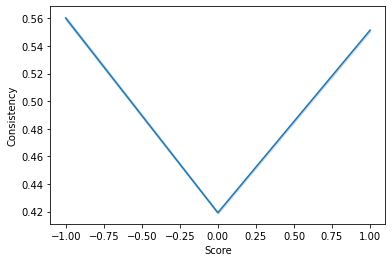

In [8]:
sns.lineplot(data=sims,x='Score',y='Consistency');

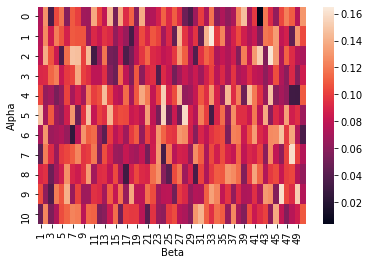

In [12]:
d = sims[sims['Gamma']==0.5].pivot_table(values='Score',index=['Alpha'],columns=['Beta'],aggfunc=np.mean)
sns.heatmap(d);

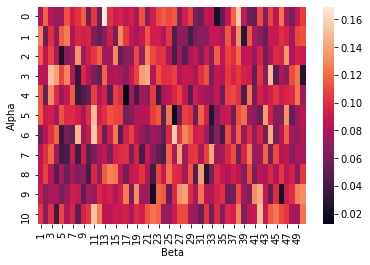

In [15]:
d = sims[sims['Gamma']==-0.5].pivot_table(values='Score',index=['Alpha'],columns=['Beta'],aggfunc=np.mean)
sns.heatmap(d);